<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Prediction-Accuracy-(Comparison-of-single-user-predictions-across-models-with-increasing-number-of-trained-users)" data-toc-modified-id="Prediction-Accuracy-(Comparison-of-single-user-predictions-across-models-with-increasing-number-of-trained-users)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prediction Accuracy (Comparison of single user predictions across models with increasing number of trained users)</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Descriptive statistics</a></span><ul class="toc-item"><li><span><a href="#Model" data-toc-modified-id="Model-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Benchmark" data-toc-modified-id="Benchmark-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Benchmark</a></span></li></ul></li><li><span><a href="#Accuracy-for-all-guesses" data-toc-modified-id="Accuracy-for-all-guesses-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Accuracy for all guesses</a></span><ul class="toc-item"><li><span><a href="#All-guesses-accuracy-(Lineplot)" data-toc-modified-id="All-guesses-accuracy-(Lineplot)-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>All guesses accuracy (Lineplot)</a></span></li><li><span><a href="#All-guesses-accuracy-(Boxplot)" data-toc-modified-id="All-guesses-accuracy-(Boxplot)-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>All guesses accuracy (Boxplot)</a></span></li></ul></li><li><span><a href="#Accuracy-by-turn" data-toc-modified-id="Accuracy-by-turn-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Accuracy by turn</a></span><ul class="toc-item"><li><span><a href="#After-first-trained-user" data-toc-modified-id="After-first-trained-user-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>After first trained user</a></span></li><li><span><a href="#After-mid-point-trained-user" data-toc-modified-id="After-mid-point-trained-user-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>After mid-point trained user</a></span></li><li><span><a href="#After-last-trained-user" data-toc-modified-id="After-last-trained-user-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>After last trained user</a></span></li></ul></li><li><span><a href="#Accuracy-by-game-stages" data-toc-modified-id="Accuracy-by-game-stages-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Accuracy by game stages</a></span><ul class="toc-item"><li><span><a href="#Opening-accuracy" data-toc-modified-id="Opening-accuracy-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Opening accuracy</a></span></li><li><span><a href="#Middlegame-accuracy" data-toc-modified-id="Middlegame-accuracy-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Middlegame accuracy</a></span></li><li><span><a href="#Endgame-accuracy-(Upper-limit-at-100-turns)" data-toc-modified-id="Endgame-accuracy-(Upper-limit-at-100-turns)-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Endgame accuracy (Upper limit at 100 turns)</a></span></li><li><span><a href="#Endgame-accuracy-(No-upper-limit-for-turns)" data-toc-modified-id="Endgame-accuracy-(No-upper-limit-for-turns)-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Endgame accuracy (No upper limit for turns)</a></span></li><li><span><a href="#Boxplot-comparison-of-game-stages" data-toc-modified-id="Boxplot-comparison-of-game-stages-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>Boxplot comparison of game stages</a></span></li></ul></li></ul></li></ul></div>

# Libraries

In [118]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [119]:
#OS libs
import os
# File management
from util_functions.file_management import (filter_by, sort_by, split_pred, split_data)
from util_functions.plot_predictions import (get_stats_for_all_predictions,
                                             plot_pdf_multiple_users,
                                             plot_cdf_multiple_users,
                                             plot_boxplot_multiple_users,
                                             get_stats_for_predictions_by_turn,
                                             plot_single_acc_by_turn,
                                             get_mean_of_predictions_by_turn,
                                             get_predictions_by_game_stage_from_turn,
                                             boxplot_game_stages,
                                             boxplot_game_stages_w_benchmark_lines,
                                             plot_single_accuracy_line,
                                             unique_predictions)
#Data handling libs
import pandas as pd

data_folder = os.path.join(os.getcwd(),'dt_chess','datasets')
losses_folder = os.path.join(os.getcwd(),'dt_chess','training_losses')
dt_pred_folder = os.path.join(os.getcwd(),'dt_chess','datasets_test_predictions')
benchmark_pred_folder = os.path.join(os.getcwd(),'dt_chess','datasets_test_benchmark')
pred_files = os.listdir(dt_pred_folder)
bench_pred_files = os.listdir(benchmark_pred_folder)
user_id = 400
all_acc_stats = ["top_1_accuracy", "engine_choice_2_accuracy", "engine_choice_3_accuracy",
                 "top_2_accuracy", "top_3_accuracy"]
top_k_acc = ["top_1_accuracy", "top_2_accuracy", "top_3_accuracy"]
all_acc_stats_bench = ["benchmark_top_1_accuracy", "benchmark_engine_choice_2_accuracy",
                 "benchmark_engine_choice_3_accuracy", "benchmark_top_2_accuracy",
                 "benchmark_top_3_accuracy"]
top_k_acc_bench = ["benchmark_top_1_accuracy", "benchmark_top_2_accuracy", "benchmark_top_3_accuracy"]
hist_stat='count'

# Prediction Accuracy (Comparison of single user predictions across models with increasing number of trained users)

## Descriptive statistics

### Model

In [120]:
pred_files_user = filter_by(pred_files, split_pred, user_id=user_id)
pred_files_user = sort_by(pred_files_user, split_pred, [('num_users', False)])

user_df = get_stats_for_all_predictions(dt_pred_folder, pred_files_user, data_folder)
user_df.index += 1
display(user_df.head().style.format(thousands=','))

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [24:42<00:00,  3.71s/it]


In [121]:
user_df.describe()[all_acc_stats]

top_1_accuracy  engine_choice_2_accuracy  engine_choice_3_accuracy  \
count      400.000000                400.000000                400.000000   
mean        30.192062                 14.397123                  9.072987   
std          1.576898                  0.495618                  0.222339   
min         19.365686                 10.147905                  7.201843   
25%         29.630677                 14.249111                  8.985525   
50%         30.533999                 14.480384                  9.098533   
75%         31.142565                 14.681299                  9.202918   
max         32.986621                 15.528200                  9.499924   

       top_2_accuracy  top_3_accuracy  
count      400.000000      400.000000  
mean        44.589185       53.662172  
std          2.033319        2.199919  
min         29.513591       36.715433  
25%         43.933825       53.024427  
50%         45.000401       54.114201  
75%         45.817249       54.962633  
max         48.393647       57.825892

### Benchmark

In [122]:
bench_pred_file = filter_by(bench_pred_files, split_data, user_id=user_id)
bench_user_df = get_stats_for_all_predictions(benchmark_pred_folder, bench_pred_file,
                                               data_folder, split_type=split_data)
bench_user_df.index += 1
for i in range(len(all_acc_stats)):
    bench_user_df.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]}, inplace=True)
display(bench_user_df[all_acc_stats_bench].style.format(thousands=','))

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.66s/it]


## Accuracy for all guesses

### All guesses accuracy (Lineplot)

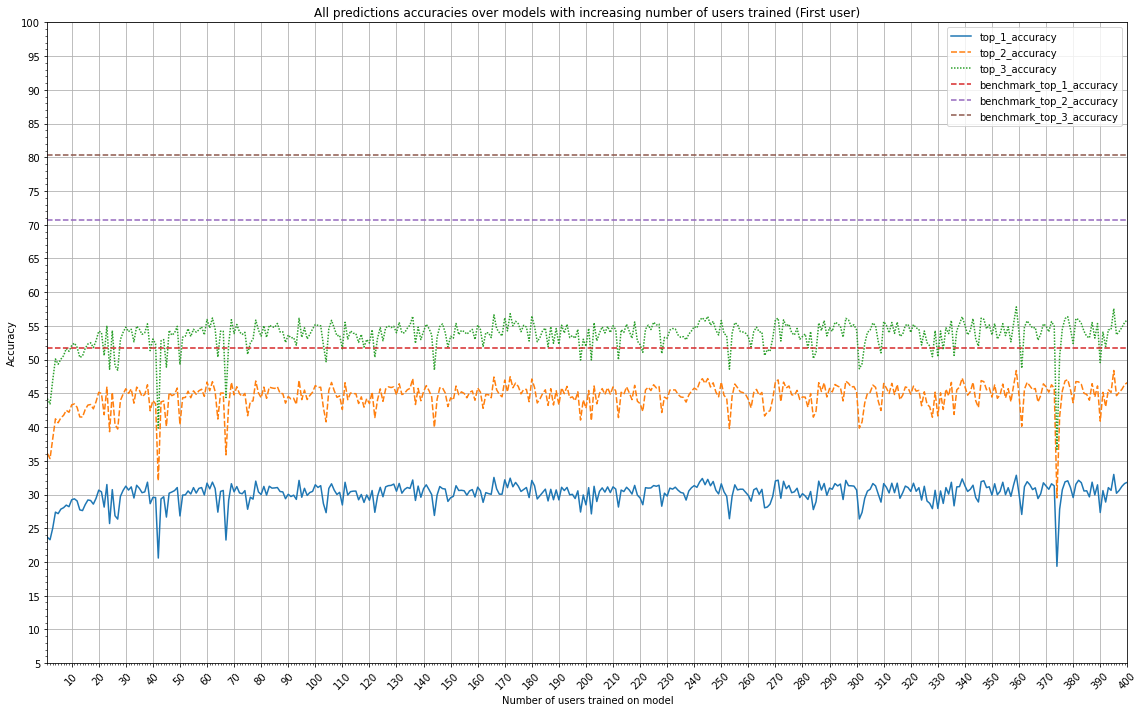

In [123]:
%matplotlib inline
plot_single_accuracy_line(user_df, top_k_acc,
                          {k:bench_user_df.to_dict(orient='list')[k] for k in top_k_acc_bench[:]})

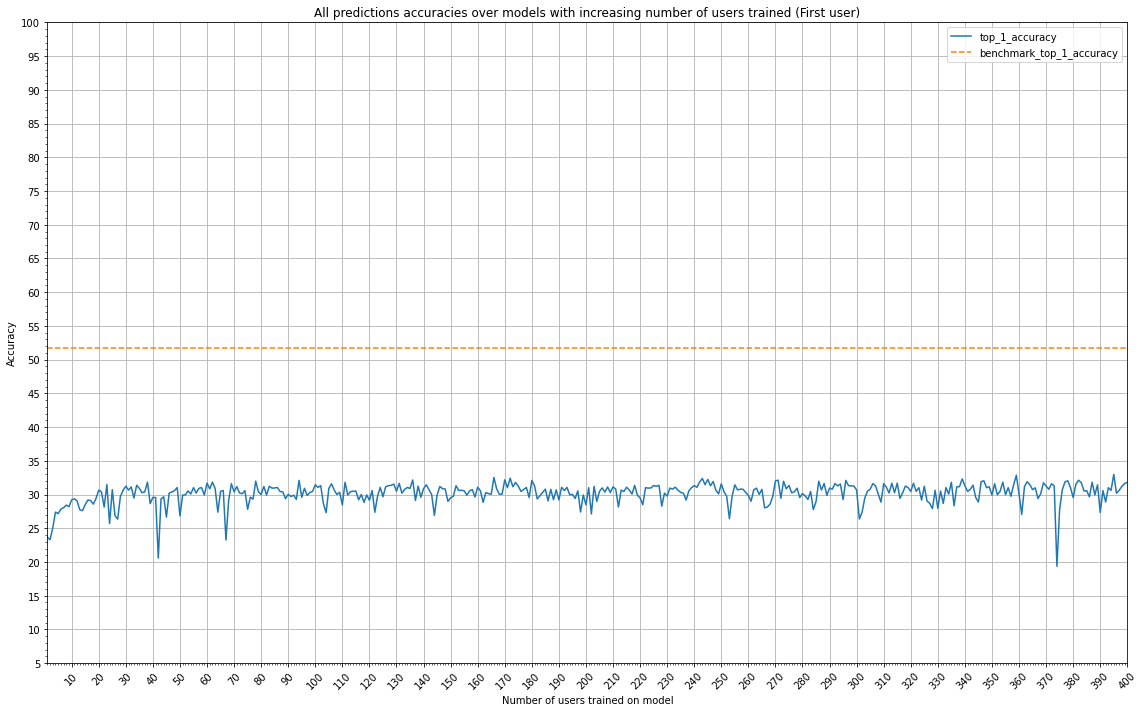

In [124]:
%matplotlib inline
plot_single_accuracy_line(user_df, top_k_acc[:1],
                          {k:bench_user_df.to_dict(orient='list')[k] for k in top_k_acc_bench[:1]})

### All guesses accuracy (Boxplot)

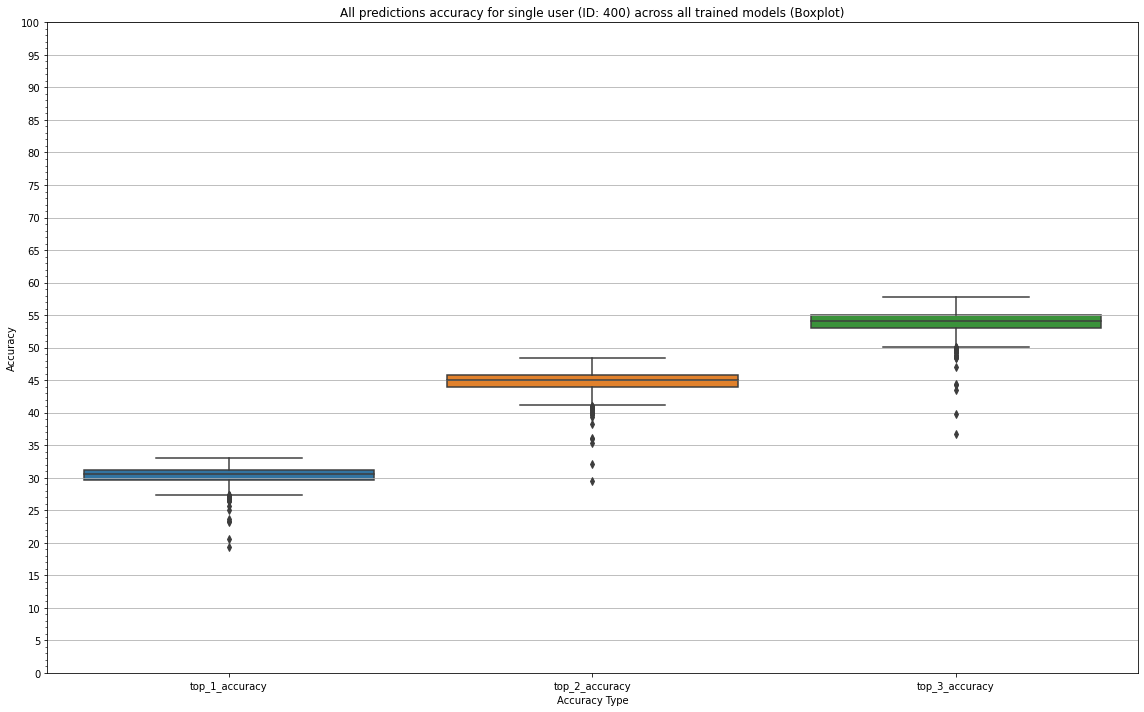

In [125]:
%matplotlib inline
plot_boxplot_multiple_users(user_df, top_k_acc,
                            title=f"All predictions accuracy for single user (ID: {user_id})"
                                  f" across all trained models (Boxplot)")

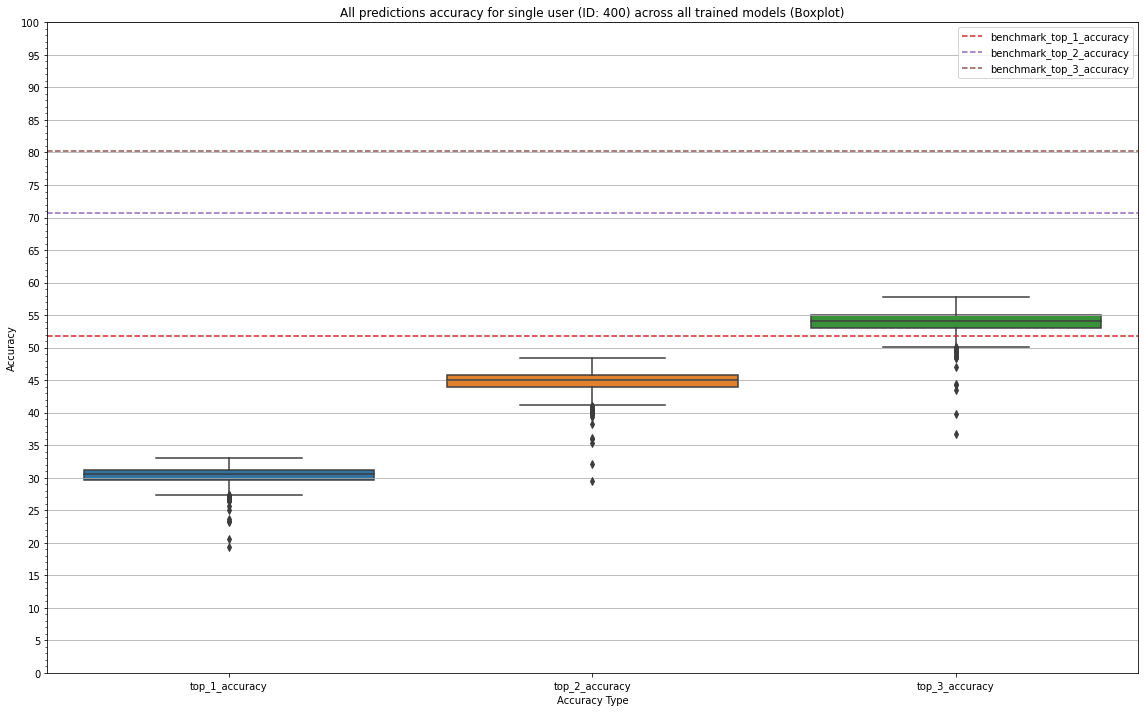

In [126]:
%matplotlib inline
plot_boxplot_multiple_users(user_df, top_k_acc,
                            benchmarks={k:bench_user_df.to_dict(orient='list')[k] for k in top_k_acc_bench[:]},
                            title=f"All predictions accuracy for single user (ID: {user_id})"
                                  f" across all trained models (Boxplot)")

## Accuracy by turn

In [127]:
user_turn_df = get_stats_for_predictions_by_turn(dt_pred_folder, pred_files_user, data_folder)
bench_user_turn_df = get_stats_for_predictions_by_turn(benchmark_pred_folder, bench_pred_file,
                                                       data_folder, split_type=split_data)
bench_user_turn_df = list(bench_user_turn_df.values())[0]
for i in range(len(all_acc_stats)):
    bench_user_turn_df.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]}, inplace=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.81s/it]


### After first trained user

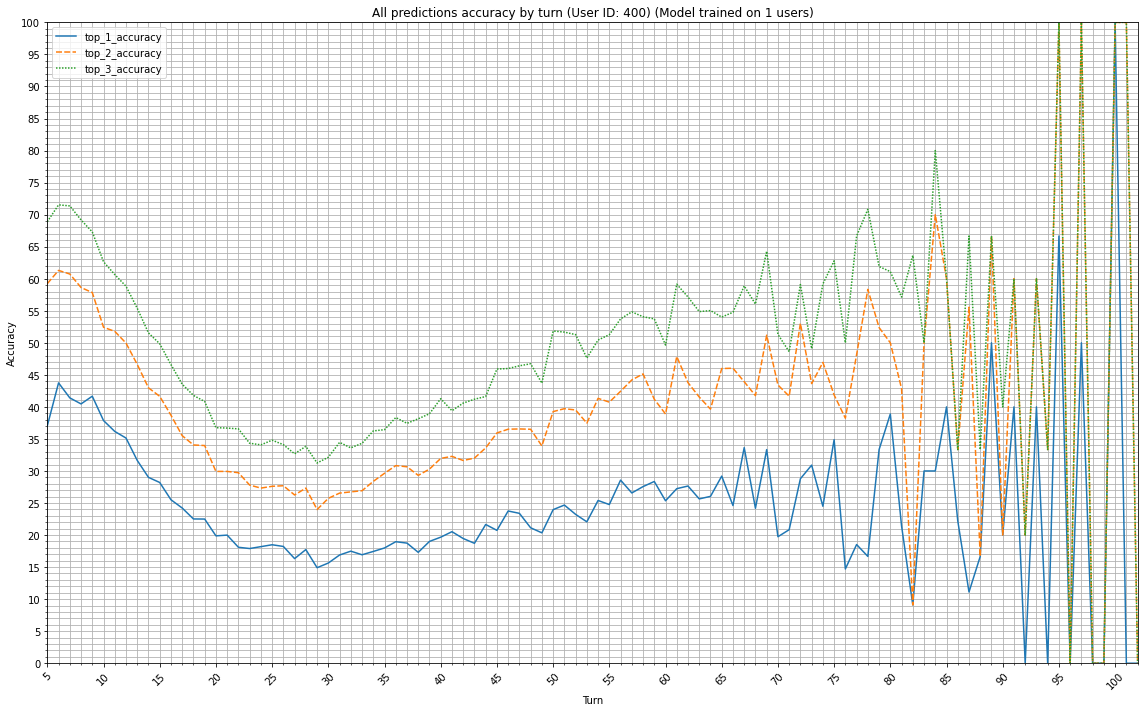

In [128]:
i, _ = (0, 85)
plot_single_acc_by_turn(user_turn_df[pred_files_user[i][:-len('.csv')]][top_k_acc],
                        user_id=user_id, model_size=i+1)

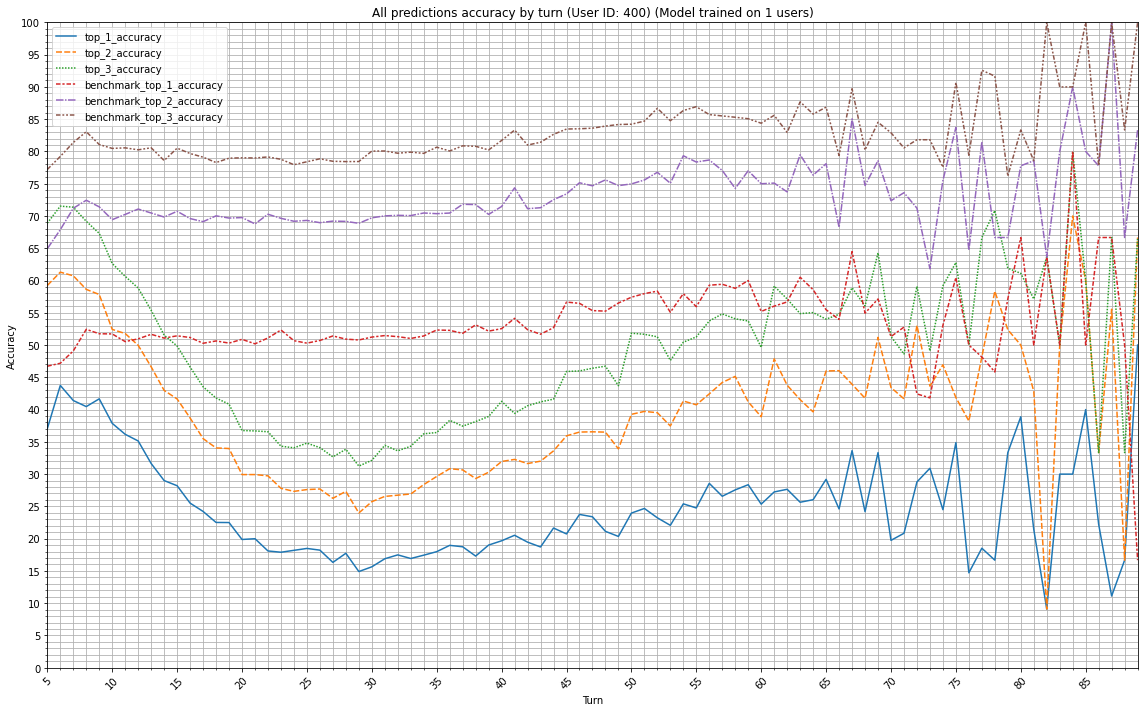

In [129]:
i, turn_cap = (0, 85)
user_turn_single_df = user_turn_df[pred_files_user[i][:-len('.csv')]][top_k_acc][:turn_cap]
plot_single_acc_by_turn(pd.concat([user_turn_single_df,
                                   bench_user_turn_df[top_k_acc_bench][:turn_cap]], axis=1),
                        user_id=user_id, model_size=i+1)

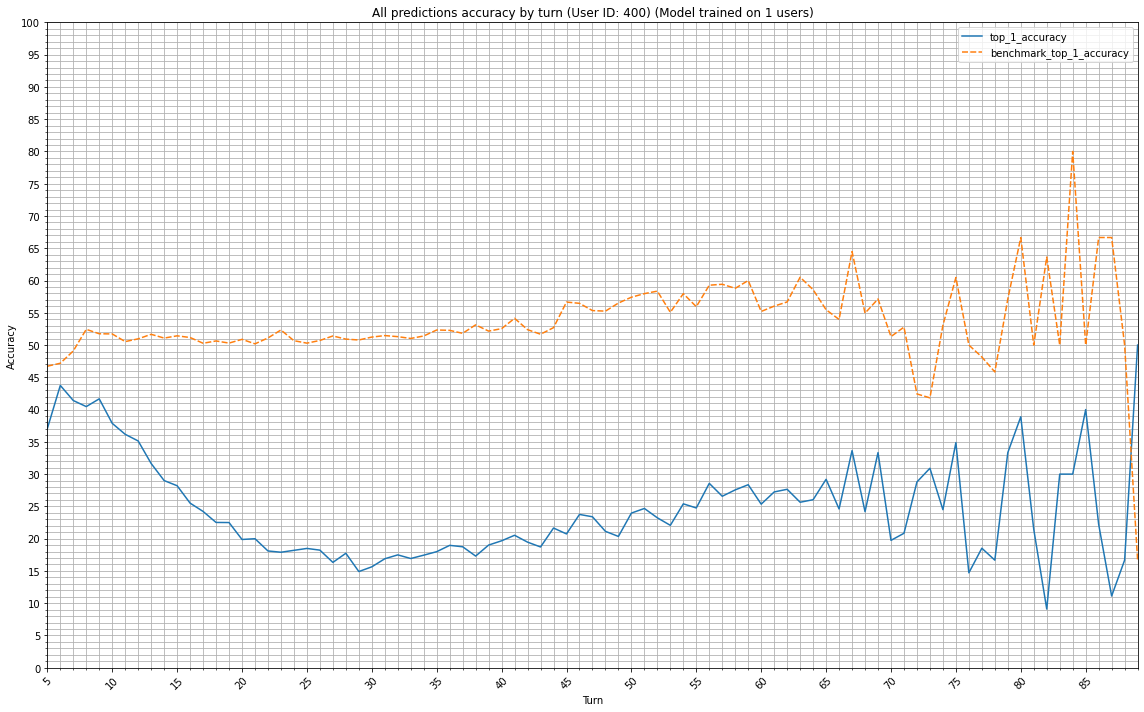

In [130]:
i, turn_cap = (0, 85)
user_turn_single_df = user_turn_df[pred_files_user[i][:-len('.csv')]][top_k_acc[0]][:turn_cap]
plot_single_acc_by_turn(pd.concat([user_turn_single_df,
                                   bench_user_turn_df[top_k_acc_bench[0]][:turn_cap]], axis=1),
                        user_id=user_id, model_size=i+1)

### After mid-point trained user

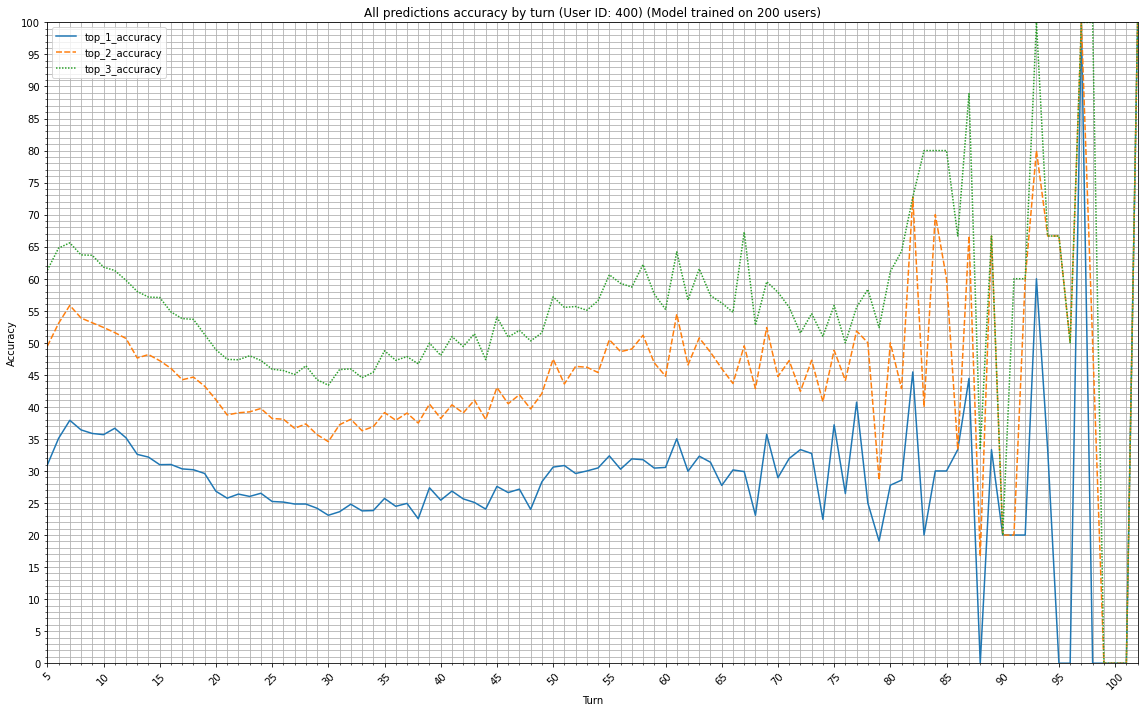

In [131]:
i, _ = (int(len(pred_files_user)/2), 85)
plot_single_acc_by_turn(user_turn_df[pred_files_user[i-1][:-len('.csv')]][top_k_acc],
                        user_id=user_id, model_size=i)

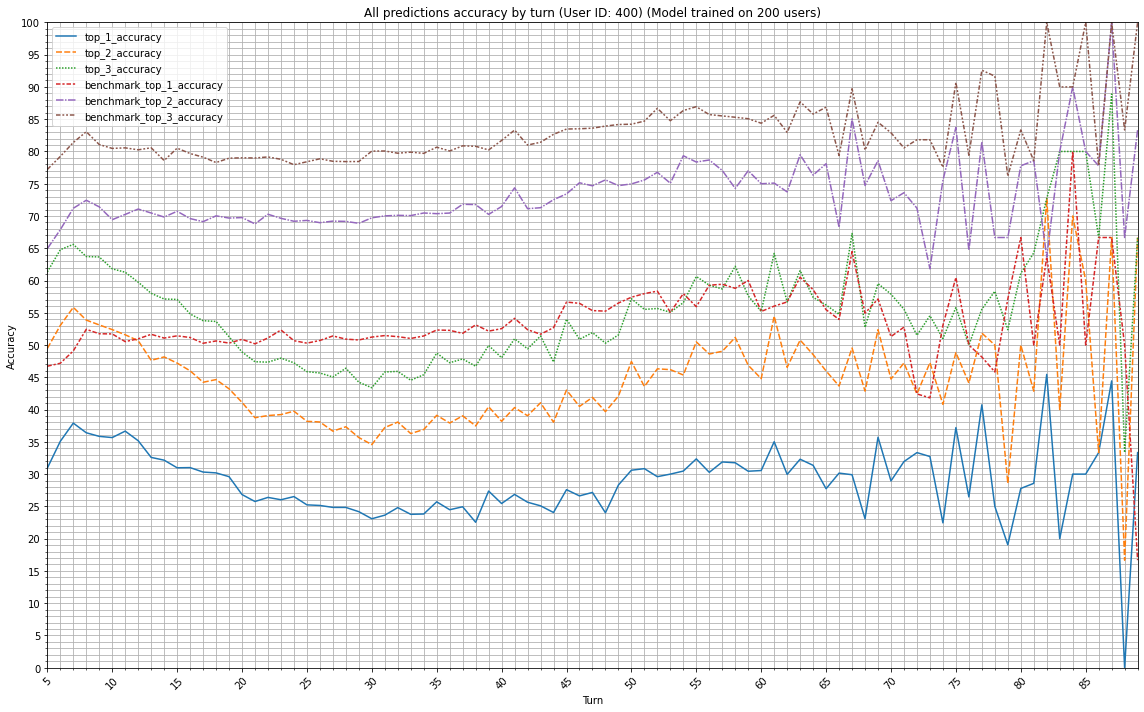

In [132]:
i, turn_cap = (int(len(pred_files_user)/2), 85)
user_turn_single_df = user_turn_df[pred_files_user[i-1][:-len('.csv')]][top_k_acc][:turn_cap]
plot_single_acc_by_turn(pd.concat([user_turn_single_df,
                                   bench_user_turn_df[top_k_acc_bench][:turn_cap]], axis=1),
                        user_id=user_id, model_size=i)

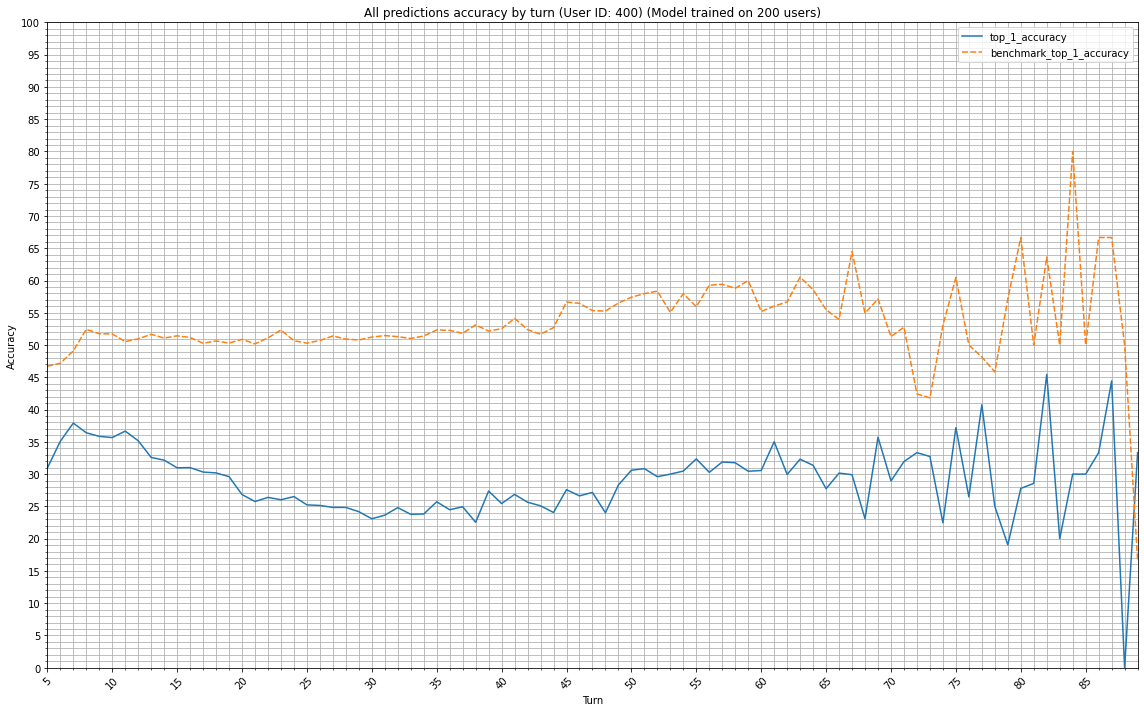

In [133]:
i, turn_cap = (int(len(pred_files_user)/2), 85)
user_turn_single_df = user_turn_df[pred_files_user[i-1][:-len('.csv')]][top_k_acc[0]][:turn_cap]
plot_single_acc_by_turn(pd.concat([user_turn_single_df,
                                   bench_user_turn_df[top_k_acc_bench[0]][:turn_cap]], axis=1),
                        user_id=user_id, model_size=i)

### After last trained user

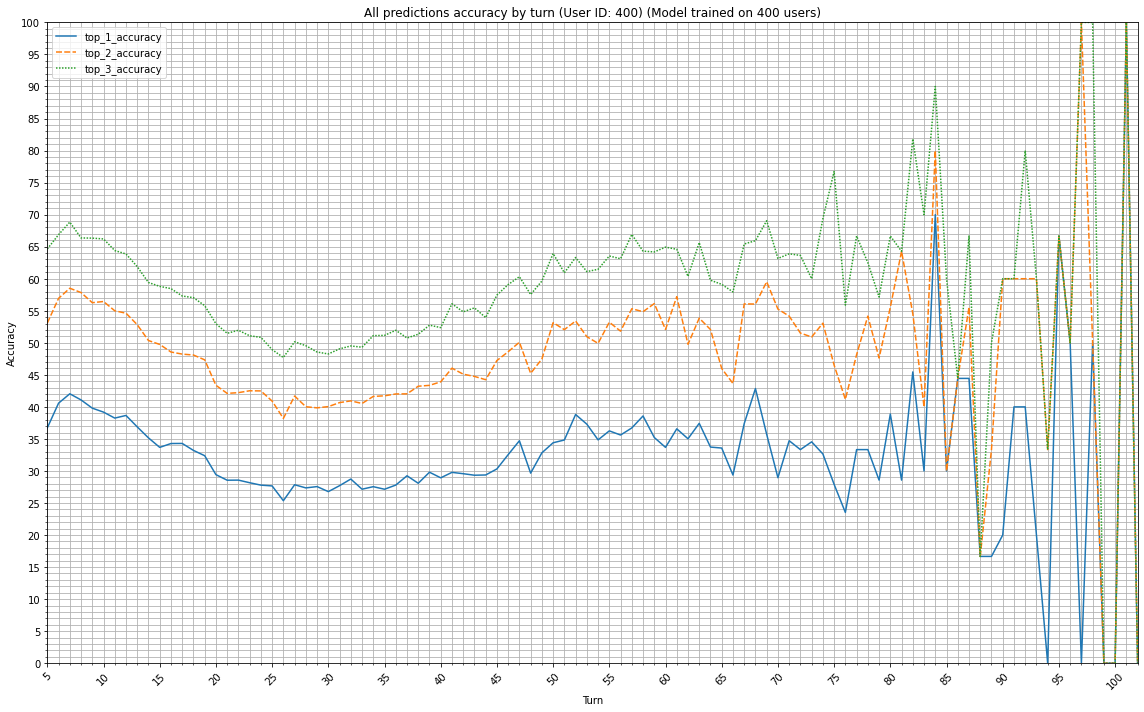

In [134]:
i, _ = (len(pred_files_user), 85)
plot_single_acc_by_turn(user_turn_df[pred_files_user[i-1][:-len('.csv')]][top_k_acc],
                        user_id=user_id, model_size=i)

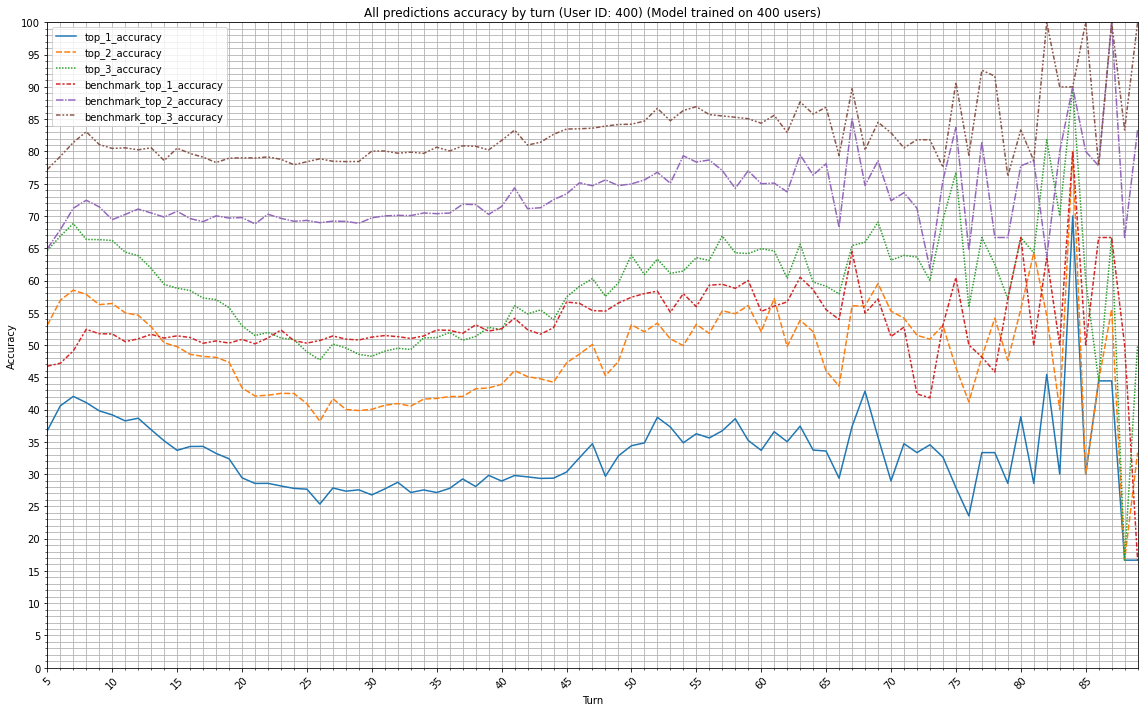

In [135]:
i, _ = (len(pred_files_user), 85)
user_turn_single_df = user_turn_df[pred_files_user[i-1][:-len('.csv')]][top_k_acc][:turn_cap]
plot_single_acc_by_turn(pd.concat([user_turn_single_df,
                                   bench_user_turn_df[top_k_acc_bench][:turn_cap]], axis=1),
                        user_id=user_id, model_size=i)

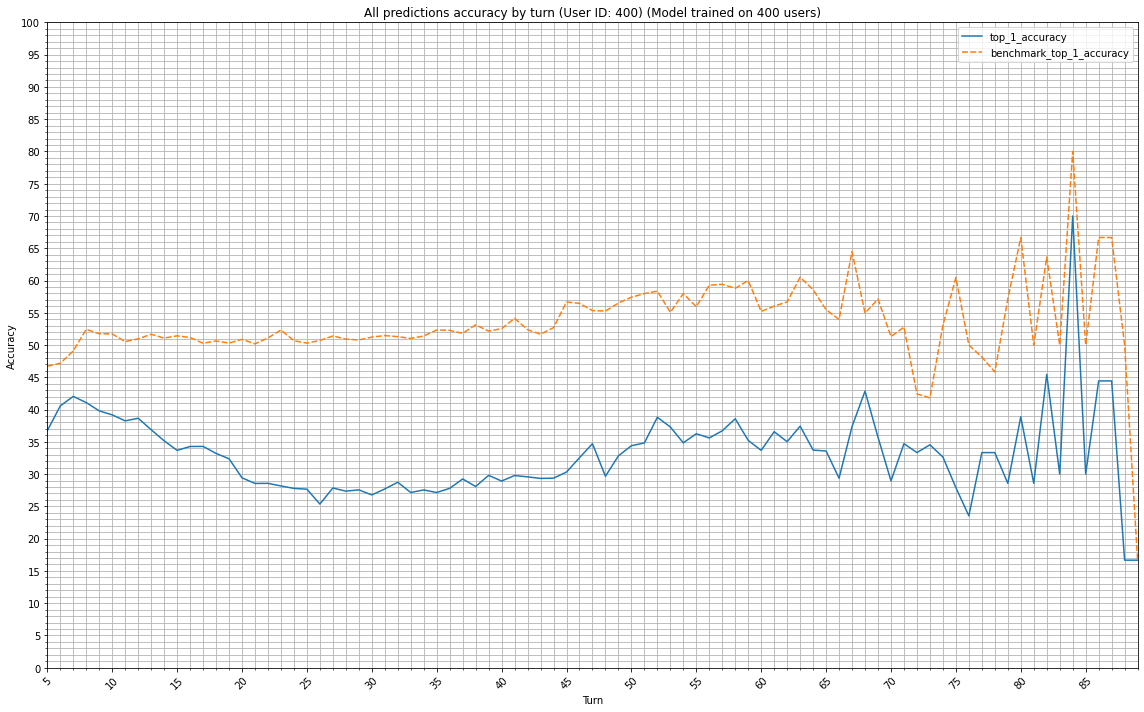

In [136]:
i, _ = (len(pred_files_user), 85)
user_turn_single_df = user_turn_df[pred_files_user[i-1][:-len('.csv')]][top_k_acc[0]][:turn_cap]
plot_single_acc_by_turn(pd.concat([user_turn_single_df,
                                   bench_user_turn_df[top_k_acc_bench[0]][:turn_cap]], axis=1),
                        user_id=user_id, model_size=i)

## Accuracy by game stages

In [137]:
idx_separate = [15, 40, 100]
df_opening, df_middle, df_end = get_predictions_by_game_stage_from_turn(user_turn_df, idx_separate,
                                                                        all_acc_stats)
_, _, df_end_uncapped = get_predictions_by_game_stage_from_turn(user_turn_df, idx_separate[:2],
                                                                all_acc_stats)
df_opening_bench, df_middle_bench, df_end_bench = get_predictions_by_game_stage_from_turn({1:bench_user_turn_df},
                                                                                          idx_separate,
                                                                                          all_acc_stats_bench)
_, _, df_end_uncapped_bench = get_predictions_by_game_stage_from_turn({1:bench_user_turn_df}, idx_separate[:2],
                                                                      all_acc_stats_bench)
for i in range(len(all_acc_stats)):
    df_opening_bench = df_opening_bench.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})
    df_middle_bench = df_middle_bench.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})
    df_end_bench = df_end_bench.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})
    df_end_uncapped_bench = df_end_uncapped_bench.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})

### Opening accuracy

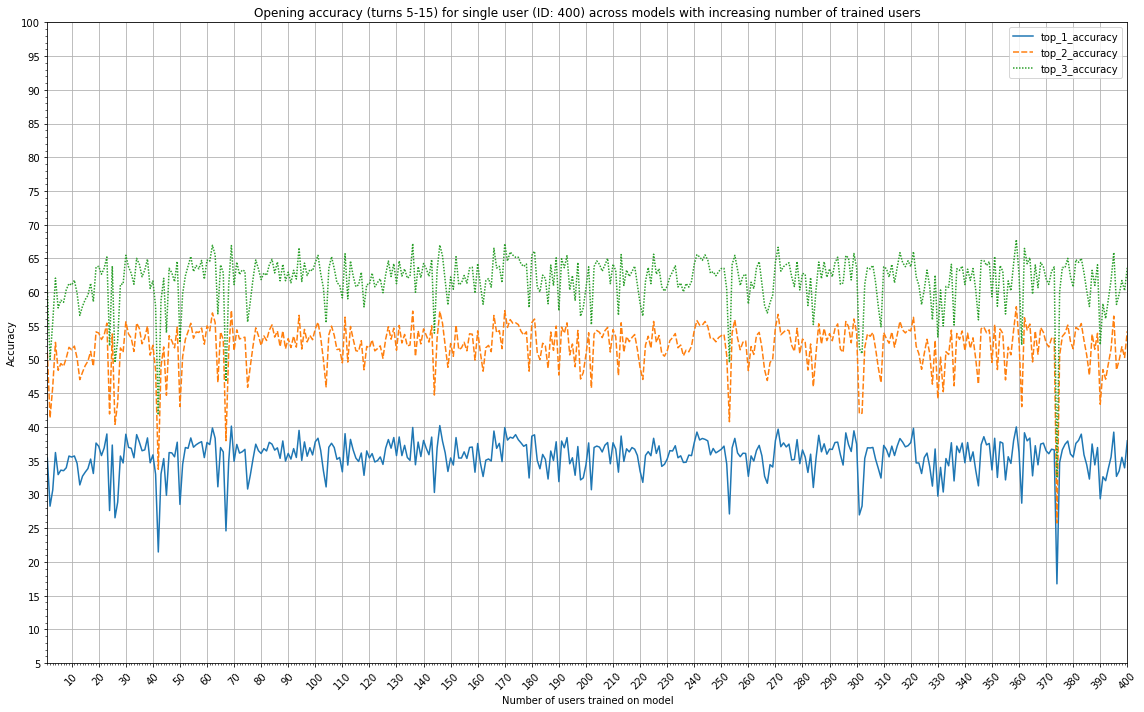

In [138]:
%matplotlib inline
plot_single_accuracy_line(df_opening, top_k_acc,
                          title=(f"Opening accuracy (turns 5-{idx_separate[0]}) for single user "
                                 f"(ID: {user_id}) across models with increasing "
                                 "number of trained users"))

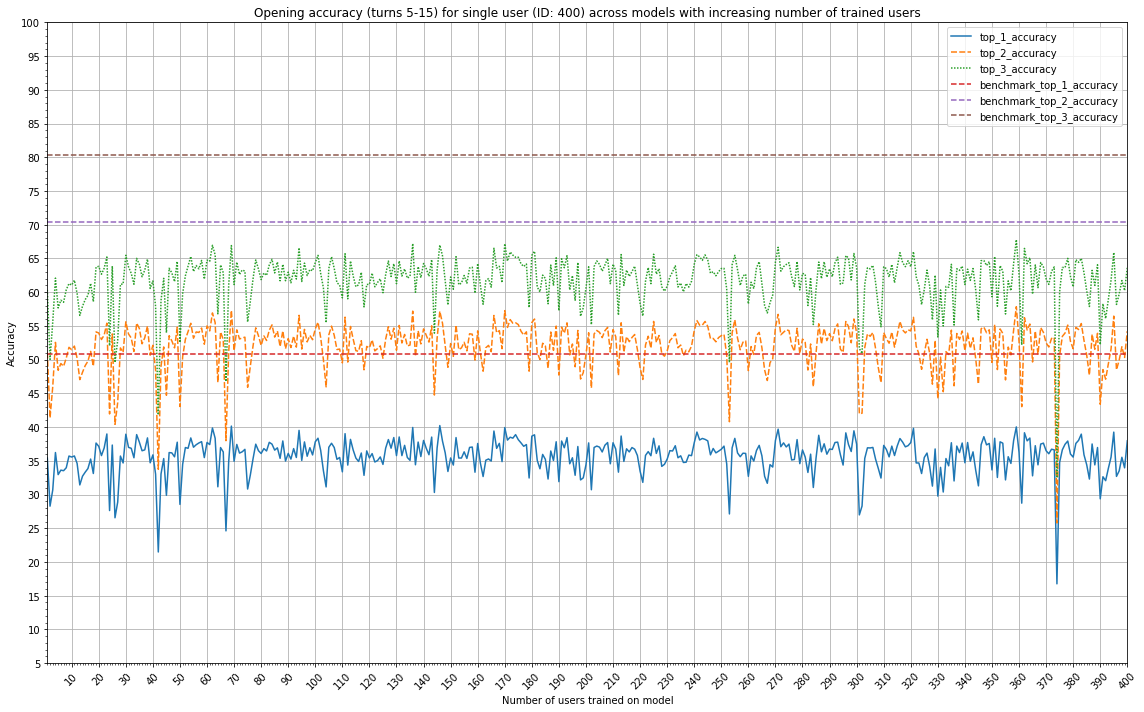

In [139]:
%matplotlib inline
plot_single_accuracy_line(df_opening, top_k_acc, 
                          {k:df_opening_bench.to_dict(orient='list')[k] for k in top_k_acc_bench[:]},
                          title=(f"Opening accuracy (turns 5-{idx_separate[0]}) for single user "
                                 f"(ID: {user_id}) across models with increasing "
                                 "number of trained users"))

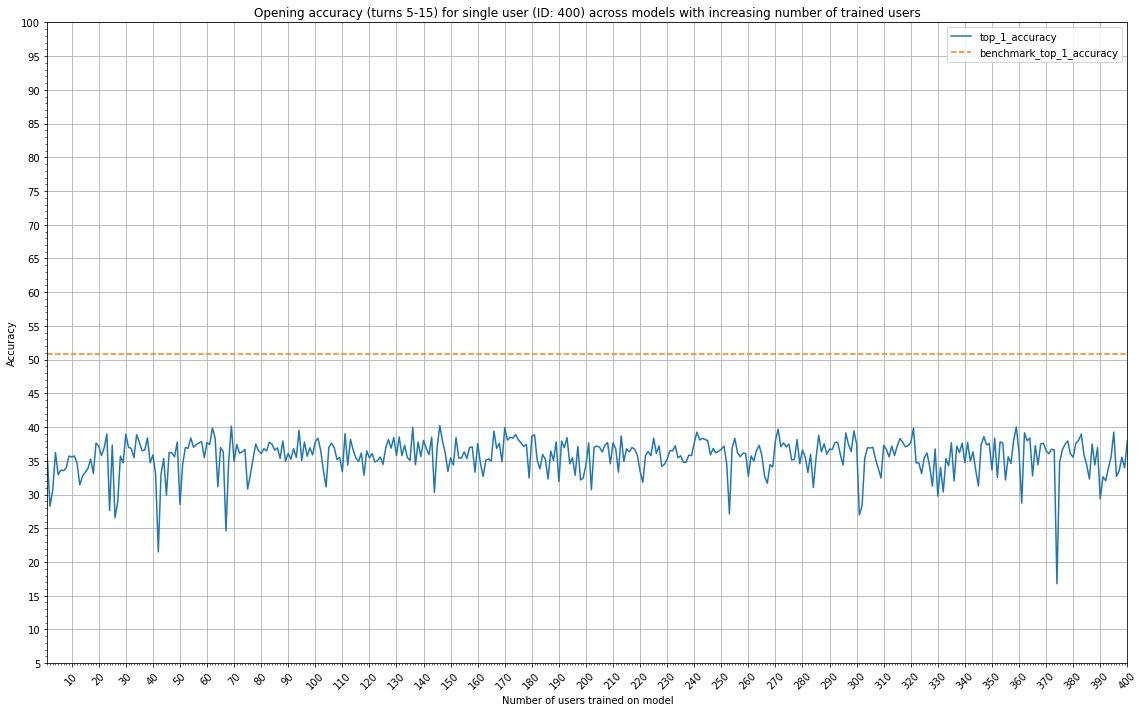

In [140]:
%matplotlib inline
plot_single_accuracy_line(df_opening, top_k_acc[:1],
                          {k:df_opening_bench.to_dict(orient='list')[k] for k in top_k_acc_bench[:1]},
                          title=(f"Opening accuracy (turns 5-{idx_separate[0]}) for single user "
                                 f"(ID: {user_id}) across models with increasing "
                                 "number of trained users"))

### Middlegame accuracy

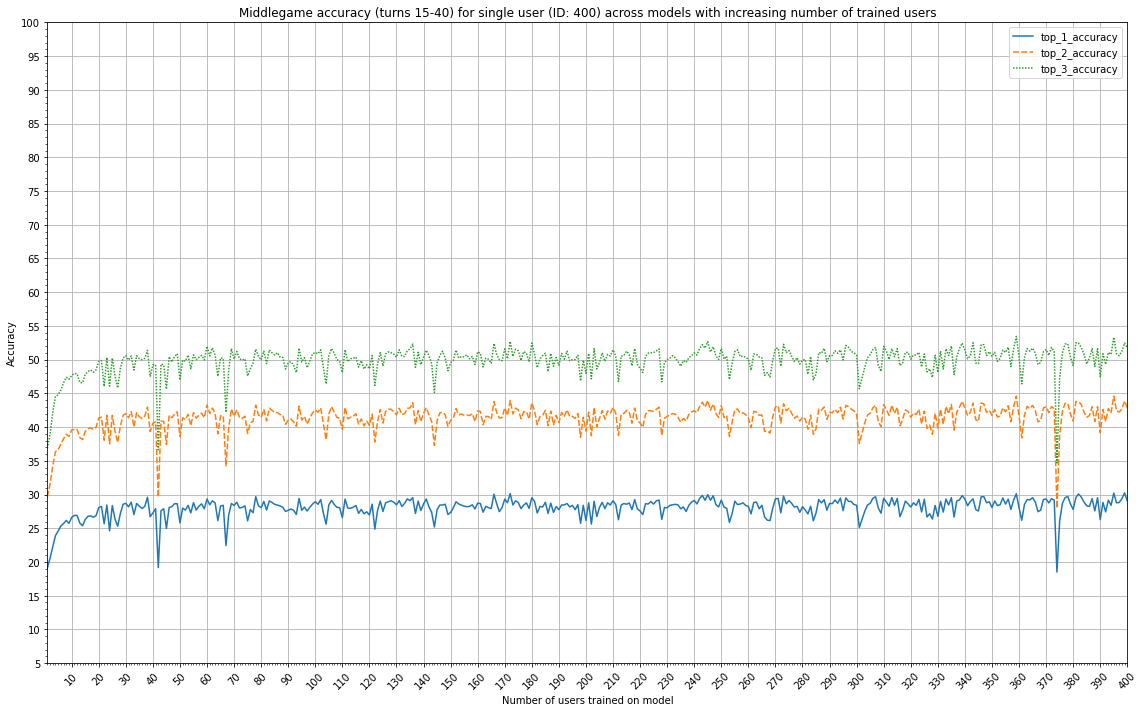

In [141]:
%matplotlib inline
plot_single_accuracy_line(df_middle, top_k_acc,
                          title=(f"Middlegame accuracy (turns {idx_separate[0]}-{idx_separate[1]})"
                                 f" for single user (ID: {user_id}) across models with increasing "
                                 "number of trained users"))

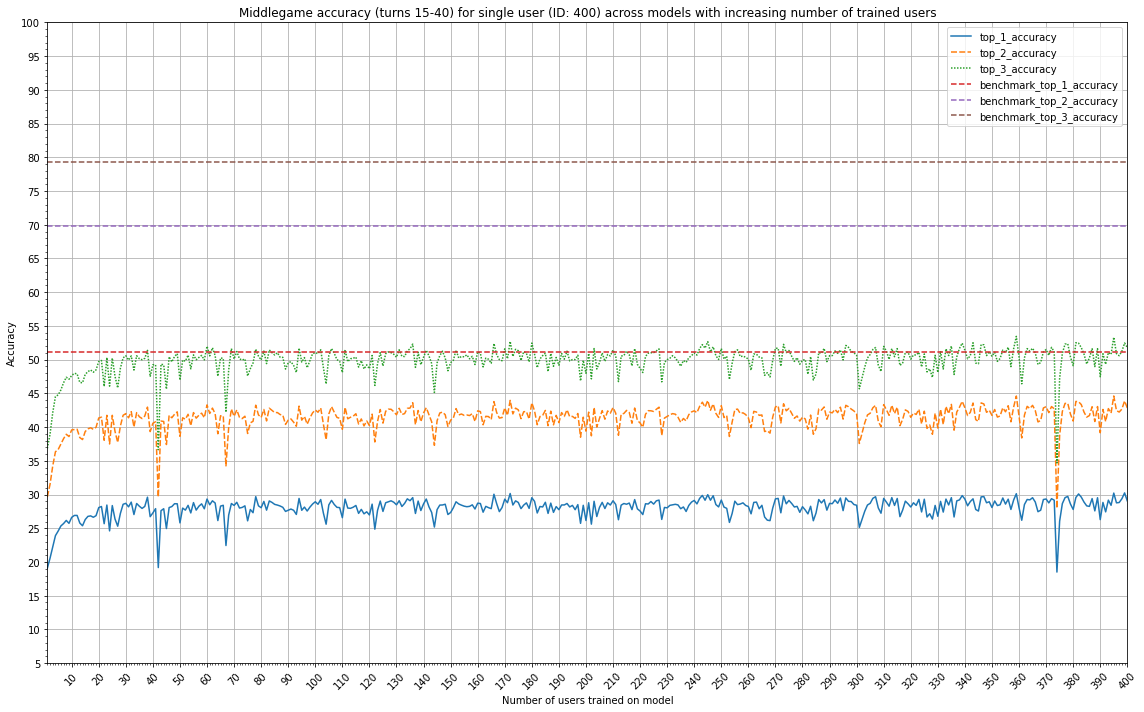

In [142]:
%matplotlib inline
plot_single_accuracy_line(df_middle, top_k_acc, 
                          {k:df_middle_bench.to_dict(orient='list')[k] for k in top_k_acc_bench[:]},
                          title=(f"Middlegame accuracy (turns {idx_separate[0]}-{idx_separate[1]})"
                                 f" for single user (ID: {user_id}) across models with increasing "
                                 "number of trained users"))

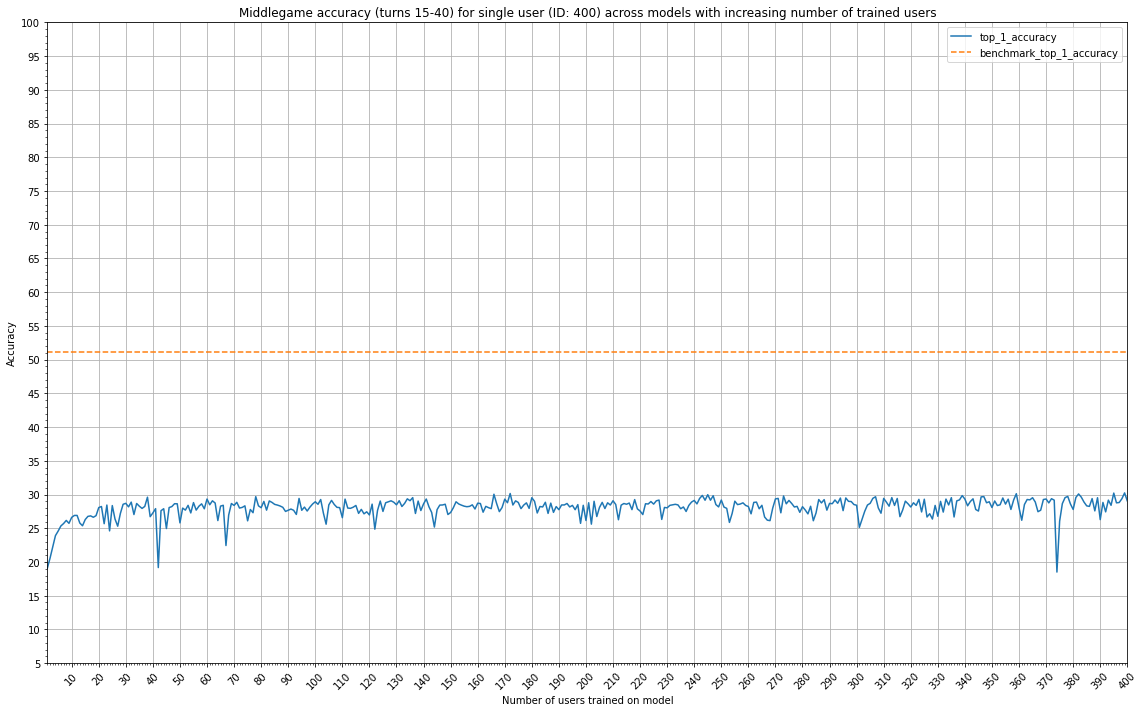

In [143]:
%matplotlib inline
plot_single_accuracy_line(df_middle, top_k_acc[:1],
                          {k:df_middle_bench.to_dict(orient='list')[k] for k in top_k_acc_bench[:1]},
                          title=(f"Middlegame accuracy (turns {idx_separate[0]}-{idx_separate[1]})"
                                 f" for single user (ID: {user_id}) across models with increasing "
                                 "number of trained users"))

### Endgame accuracy (Upper limit at 100 turns)

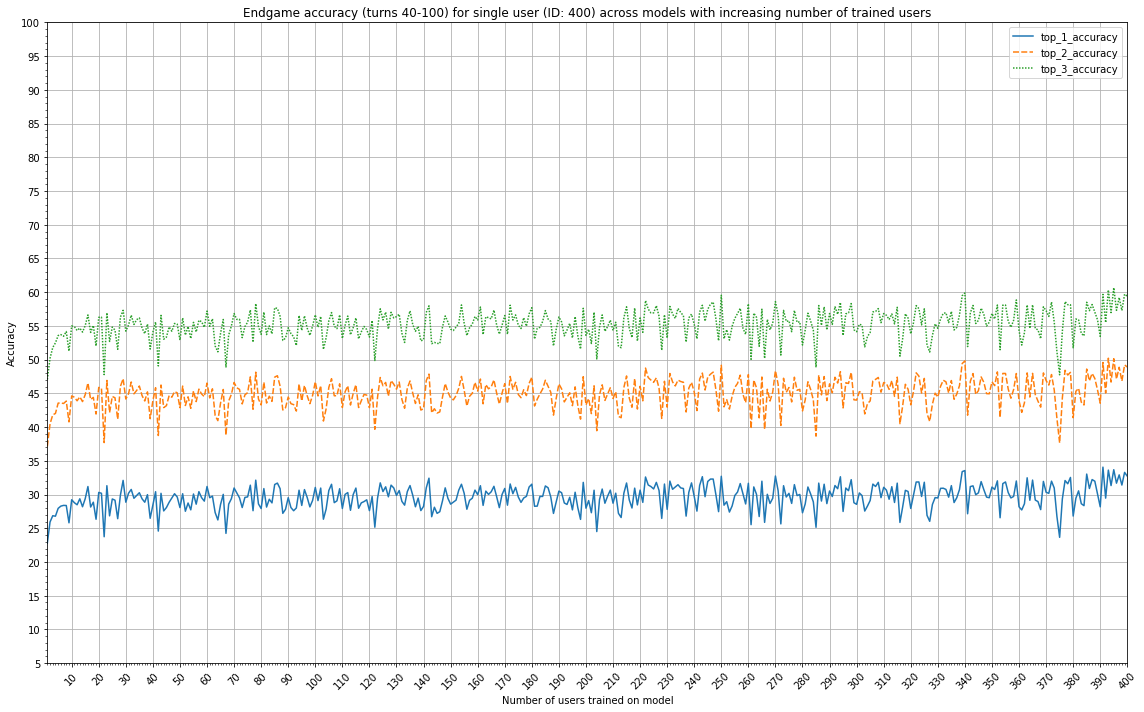

In [144]:
%matplotlib inline
plot_single_accuracy_line(df_end, top_k_acc,
                          title=(f"Endgame accuracy (turns {idx_separate[1]}-{idx_separate[2]})"
                                 f" for single user (ID: {user_id}) across models with increasing "
                                 "number of trained users"))

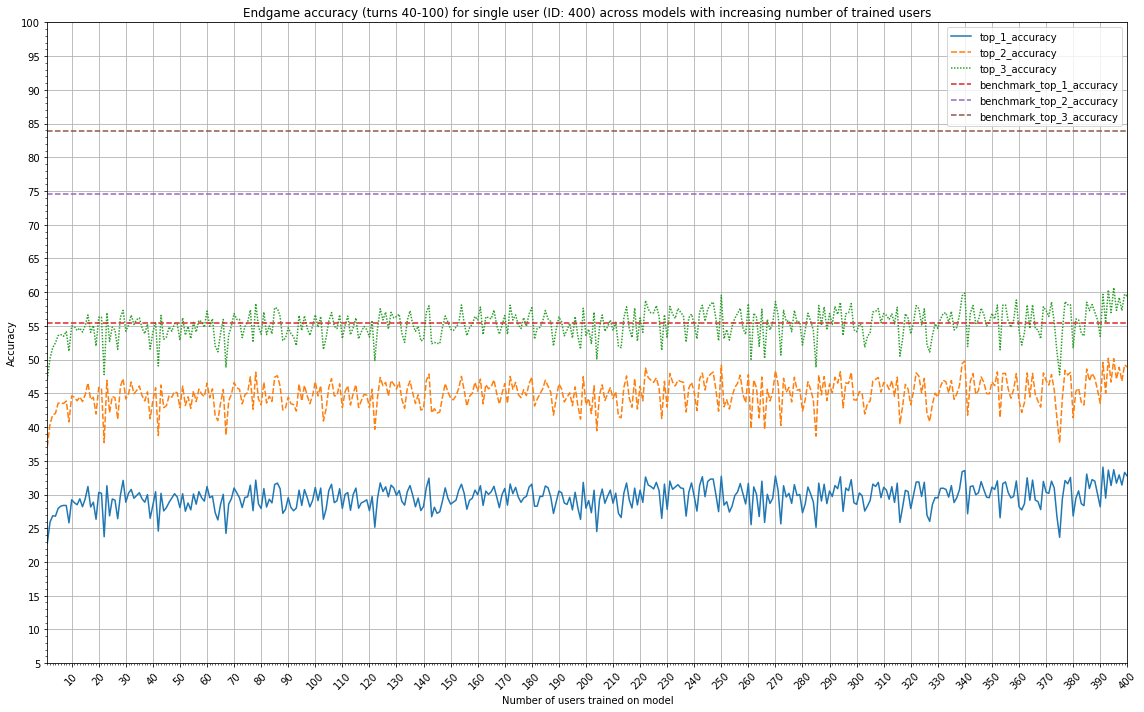

In [145]:
%matplotlib inline
plot_single_accuracy_line(df_end, top_k_acc, 
                          {k:df_end_bench.to_dict(orient='list')[k] for k in top_k_acc_bench[:]},
                          title=(f"Endgame accuracy (turns {idx_separate[1]}-{idx_separate[2]})"
                                 f" for single user (ID: {user_id}) across models with increasing "
                                 "number of trained users"))

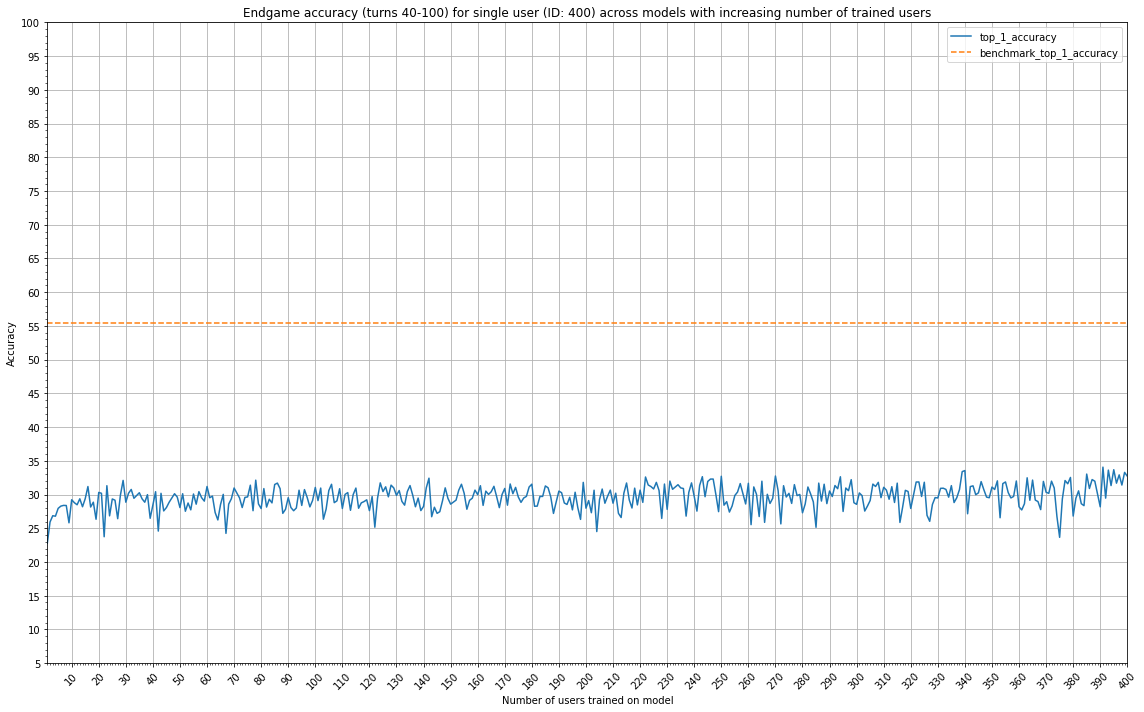

In [146]:
%matplotlib inline
plot_single_accuracy_line(df_end, top_k_acc[:1],
                          {k:df_end_bench.to_dict(orient='list')[k] for k in top_k_acc_bench[:1]},
                          title=(f"Endgame accuracy (turns {idx_separate[1]}-{idx_separate[2]})"
                                 f" for single user (ID: {user_id}) across models with increasing "
                                 "number of trained users"))

### Endgame accuracy (No upper limit for turns)

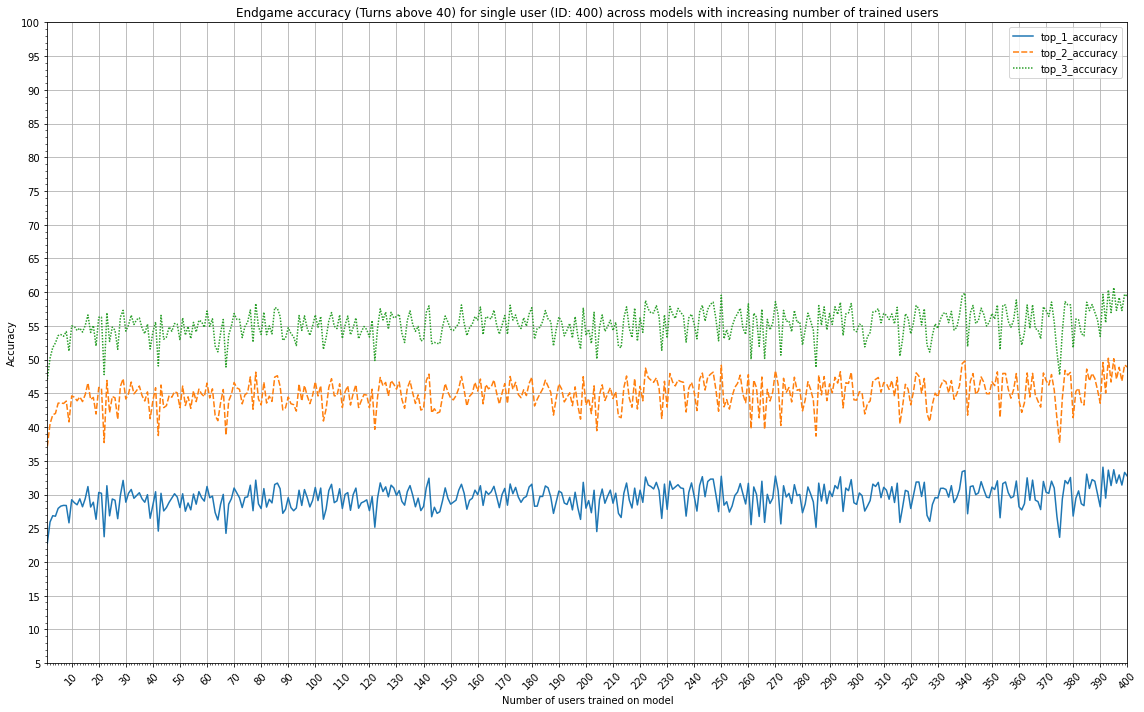

In [147]:
%matplotlib inline
plot_single_accuracy_line(df_end_uncapped, top_k_acc,
                          title=(f"Endgame accuracy (Turns above {idx_separate[1]})"
                                 f" for single user (ID: {user_id}) across models with increasing "
                                 "number of trained users"))

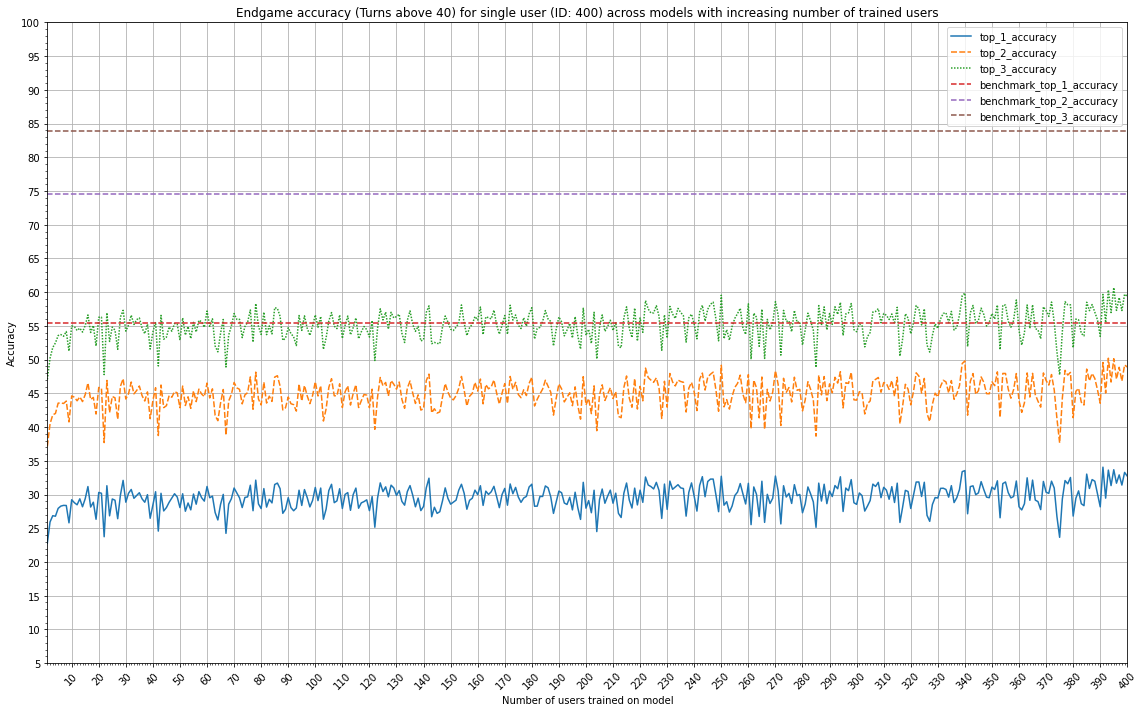

In [148]:
%matplotlib inline
plot_single_accuracy_line(df_end_uncapped, top_k_acc, 
                          {k:df_end_uncapped_bench.to_dict(orient='list')[k] for k in top_k_acc_bench[:]},
                          title=(f"Endgame accuracy (Turns above {idx_separate[1]})"
                                 f" for single user (ID: {user_id}) across models with increasing "
                                 "number of trained users"))

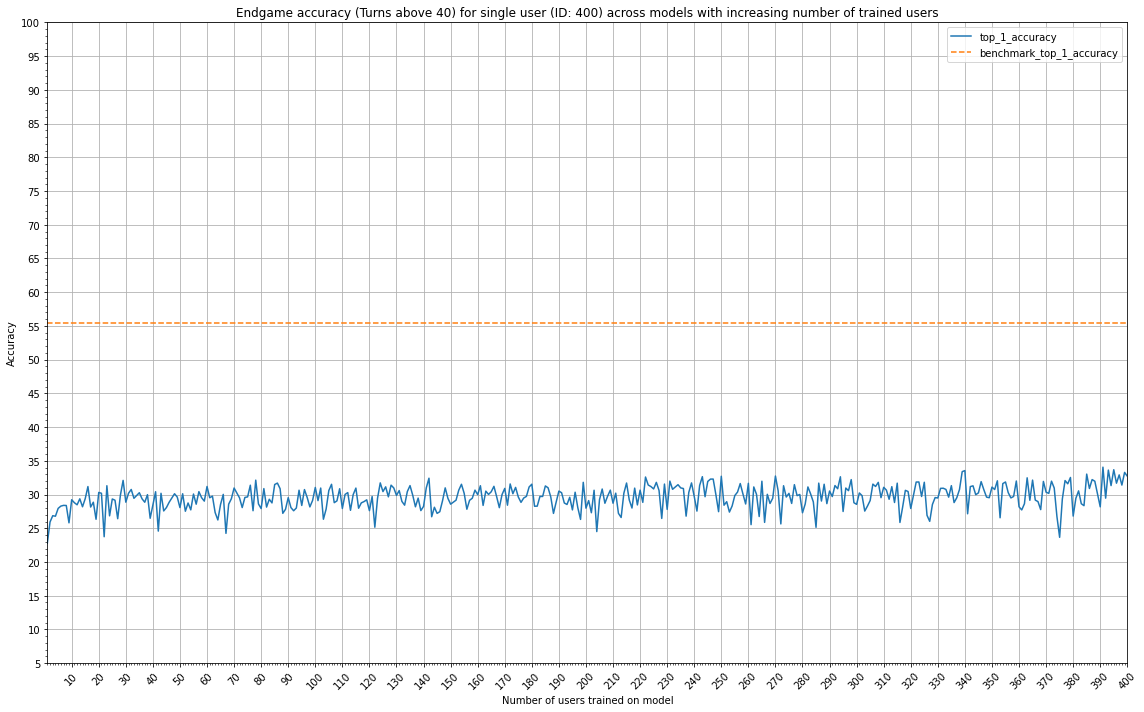

In [149]:
%matplotlib inline
plot_single_accuracy_line(df_end_uncapped, top_k_acc[:1],
                          {k:df_end_uncapped_bench.to_dict(orient='list')[k] for k in top_k_acc_bench[:1]},
                          title=(f"Endgame accuracy (Turns above {idx_separate[1]})"
                                 f" for single user (ID: {user_id}) across models with increasing "
                                 "number of trained users"))

### Boxplot comparison of game stages

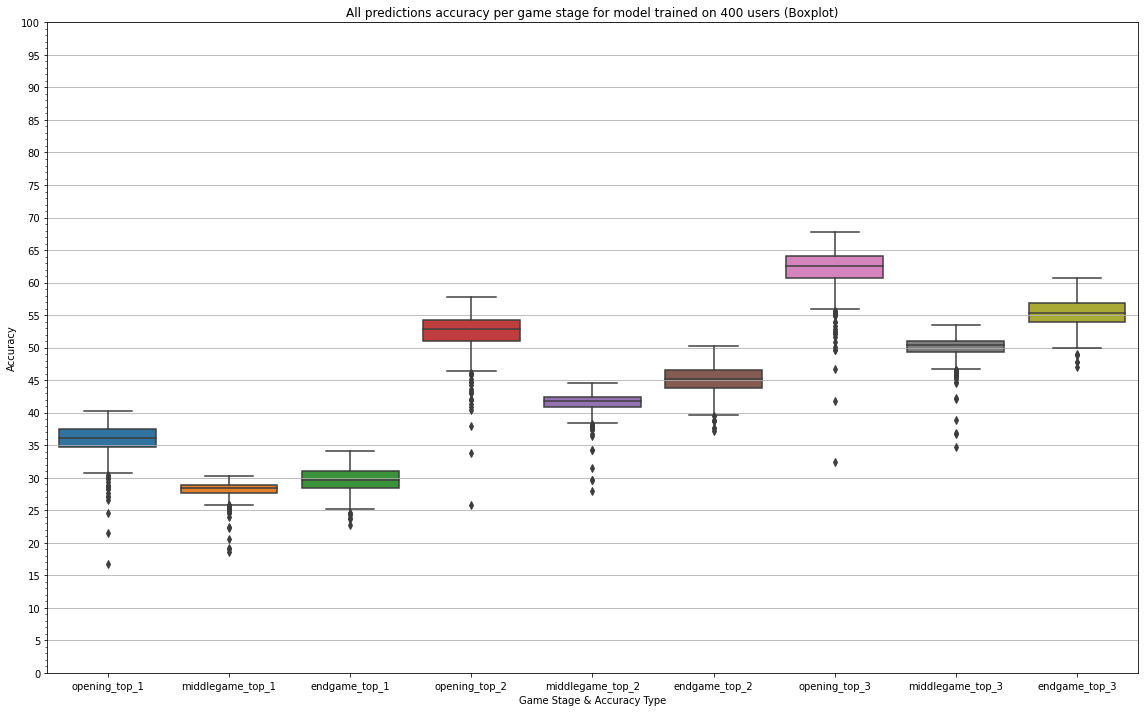

In [150]:
%matplotlib inline
boxplot_game_stages(df_opening, df_middle, df_end)

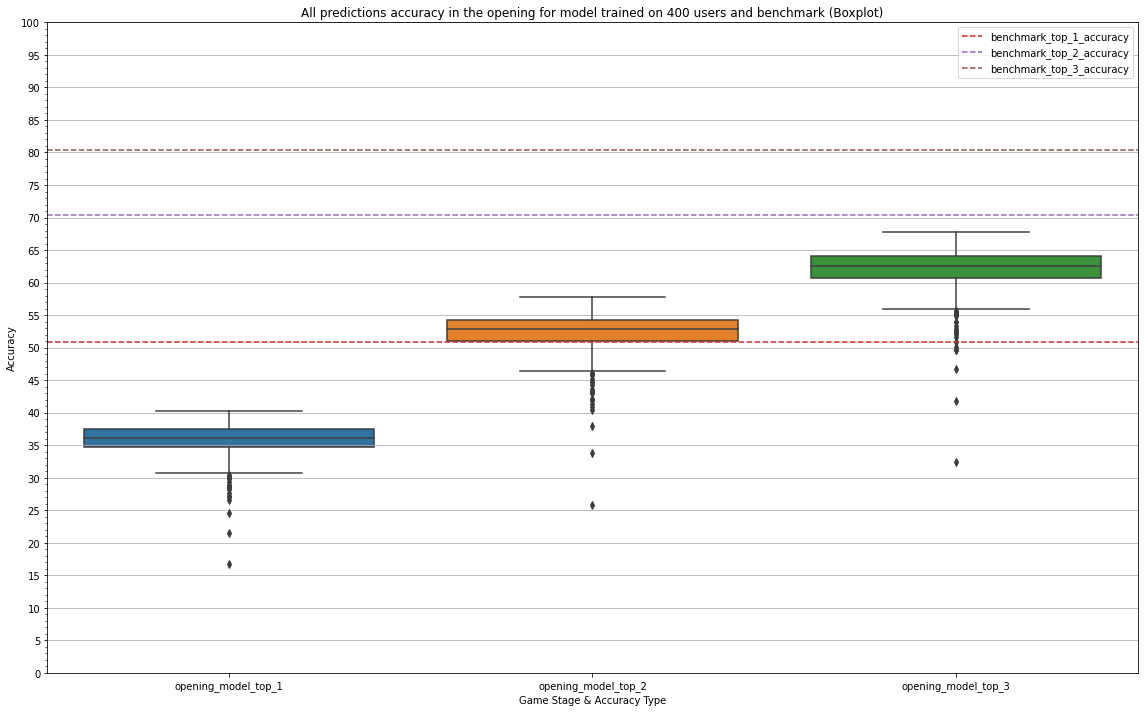

In [151]:
%matplotlib inline
boxplot_game_stages_w_benchmark_lines(df_opening, 'opening',
                                      {k:df_opening_bench.to_dict(orient='list')[k] for k in top_k_acc_bench[:]})

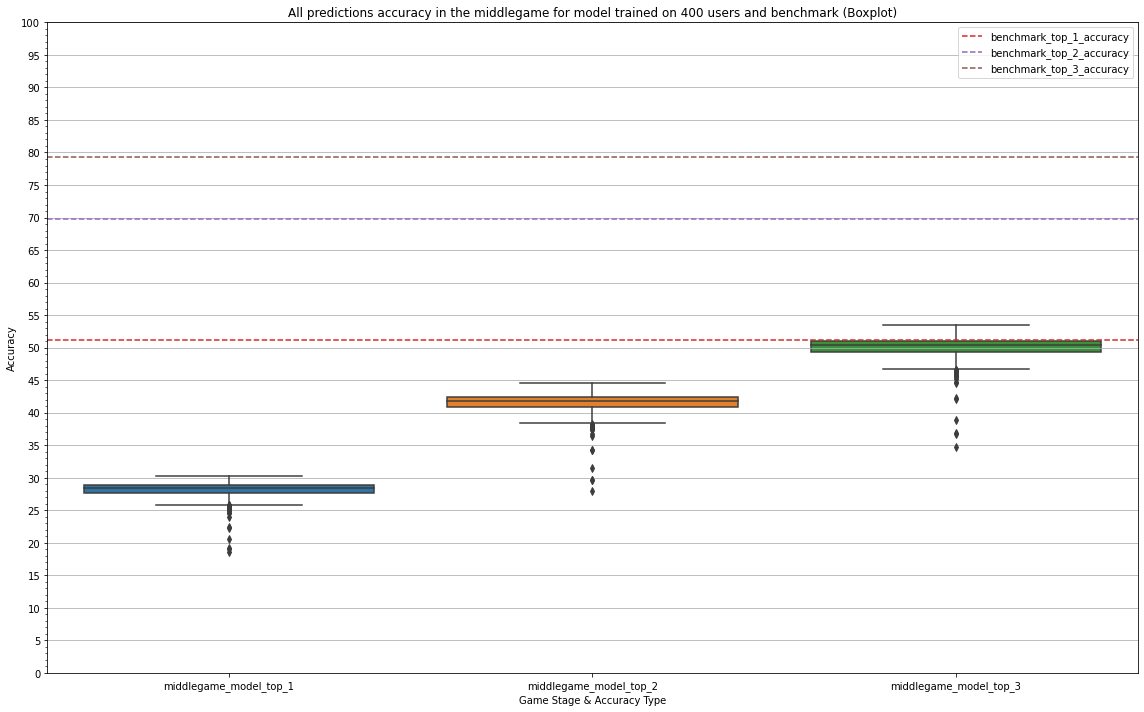

In [152]:
%matplotlib inline
boxplot_game_stages_w_benchmark_lines(df_middle, 'middlegame',
                                      {k:df_middle_bench.to_dict(orient='list')[k] for k in top_k_acc_bench[:]})

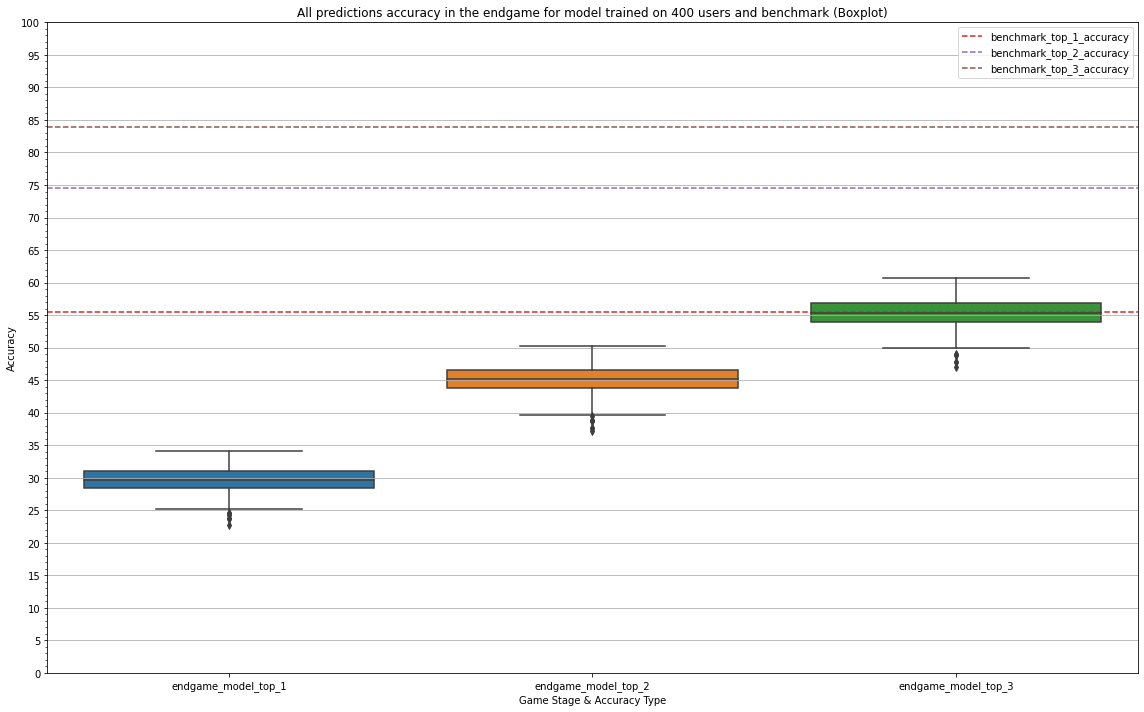

In [153]:
%matplotlib inline
boxplot_game_stages_w_benchmark_lines(df_end, 'endgame',
                                      {k:df_end_bench.to_dict(orient='list')[k] for k in top_k_acc_bench[:]})

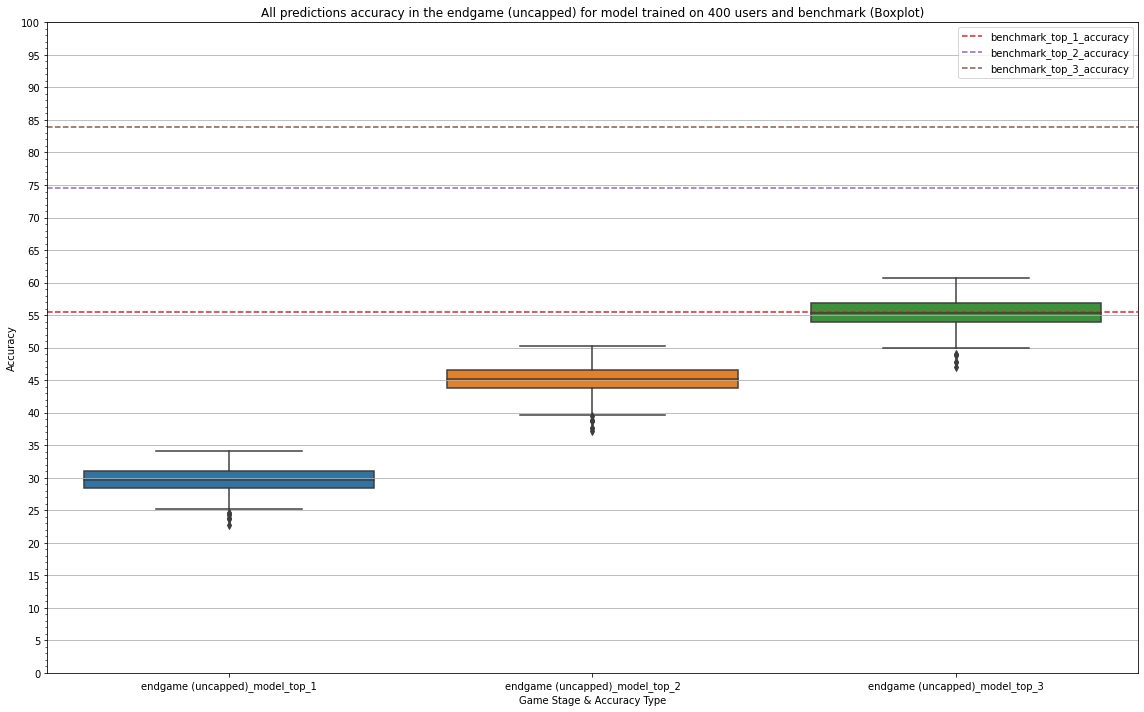

In [154]:
%matplotlib inline
boxplot_game_stages_w_benchmark_lines(df_end_uncapped, 'endgame (uncapped)',
                                      {k:df_end_uncapped_bench.to_dict(orient='list')[k] for k in top_k_acc_bench[:]})